In [23]:
#Coded by Rimple

#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [24]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
# define paths for the datasets to be used
path_rental = "Resources/Average Rents_Concat.csv"
path_units = "Resources/Number_of_Units_Concat.csv"
path_vacancy = "Resources/Vacancy Rate Concat.csv"

In [26]:
#read into files to see the column names to create a function
rental_df = pd.read_csv(path_rental)
rental_df.columns


Index(['Province', 'Centre', 'Zone', 'Neighbourhood', 'Dwelling Type ',
       'Bachelor ', '1 Bedroom', '2 Bedroom', '3 Bedroom +', 'Total ', 'Year'],
      dtype='object')

In [27]:
# units_df = units_df.loc[(units_df["Year"] == 2022 )& (units_df["Province"] == "Que")]
# units_df["Total "].sum()

In [28]:
#identify how provinces are named in the dataset
print(rental_df["Province"].unique())


['Nfld.Lab.' 'N.S.' 'N.B.' 'Que' 'Ont.' 'Man.' 'Sask.' 'Alta' 'B.C.']


In [29]:
#Create a funtion to extract based on the province and year 
def data_set(filepath,Province,Year,column):
    get_df = pd.read_csv(filepath)
    df = get_df.loc[(rental_df["Year"] == Year )& (get_df["Province"] == Province)]
    df_Province = df[(df[column]!=0)]
    return df_Province
    

In [30]:
#Check if the function works fine and get the provinces
Year = 2022
column = "2 Bedroom"
df_Ontario = data_set(path_rental, "Ont.",Year,column)
df_Quebec = data_set(path_rental,"Que",Year,column)
df_BC = data_set(path_rental, "B.C.",Year,column)
df_Alberta = data_set(path_rental, "Alta",Year,column)
df_sask = data_set(path_rental,"Sask.",Year,column)
df_NovaScotia = data_set(path_rental,"N.S.",Year,column)

In [31]:
#define Provinces name in the list
Province = ['Ont.', "Que" ,'B.C.',"Alta", "Sask.","N.S."]


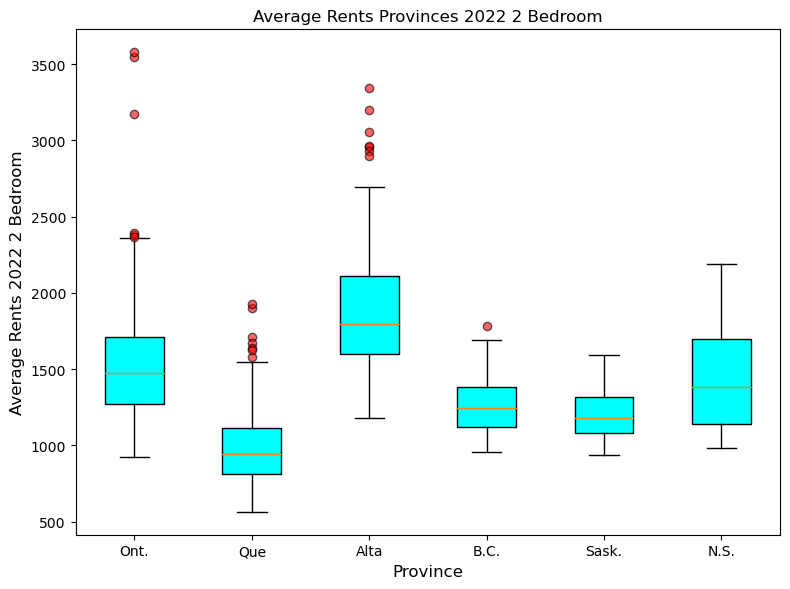

In [140]:
x_data = [df_Ontario[column],df_Quebec[column],df_BC[column],df_Alberta[column],df_sask[column],df_NovaScotia[column]]
out_patch = dict(markerfacecolor = "red", marker = "o",alpha = 0.6)
box_plot = plt.boxplot(x = x_data,labels = Province, flierprops = out_patch,patch_artist = True)
color = ["Cyan"]
colors = color*9
plt.xlabel("Province",fontsize = 12)
plt.ylabel(f"Average Rents in dollars {Year} {column}",fontsize = 12)
plt.title(f"Average Rents Provinces {Year} {column}",fontsize = 12)

for patch,color in zip(box_plot["boxes"],colors):
    patch.set_facecolor(color)
plt.savefig(f"Average Rents Provinces {Year} {column}.png")          
plt.show()

In [141]:
df_Ontario.columns

Index(['Province', 'Centre', 'Zone', 'Neighbourhood', 'Dwelling Type ',
       'Bachelor ', '1 Bedroom', '2 Bedroom', '3 Bedroom +', 'Total ', 'Year'],
      dtype='object')

In [142]:
df_Ontario["Centre"].unique()

array(['Barrie', 'Belleville', 'Brantford', 'Guelph', 'Hamilton',
       'Kingston', 'Kitchener - Cambridge - Waterl', 'London',
       'St. Catharines - Niagara', 'Oshawa', 'Ottawa', 'Peterborough',
       'Greater Sudbury / Grand Sudbur', 'Thunder Bay', 'Toronto',
       'Windsor'], dtype=object)

In [143]:
Centre_of_interest = ['Barrie', "Hamilton",
       'Kingston', 'Kitchener - Cambridge - Waterl', 'London',
       'St. Catharines - Niagara', 'Oshawa', 'Ottawa', 'Toronto',
       'Windsor']

In [144]:
Centre_data = []
for each in Centre_of_interest:
    df = df_Ontario[(df_Ontario["Centre"])==each]
    Centre_data.append(df[column])
    

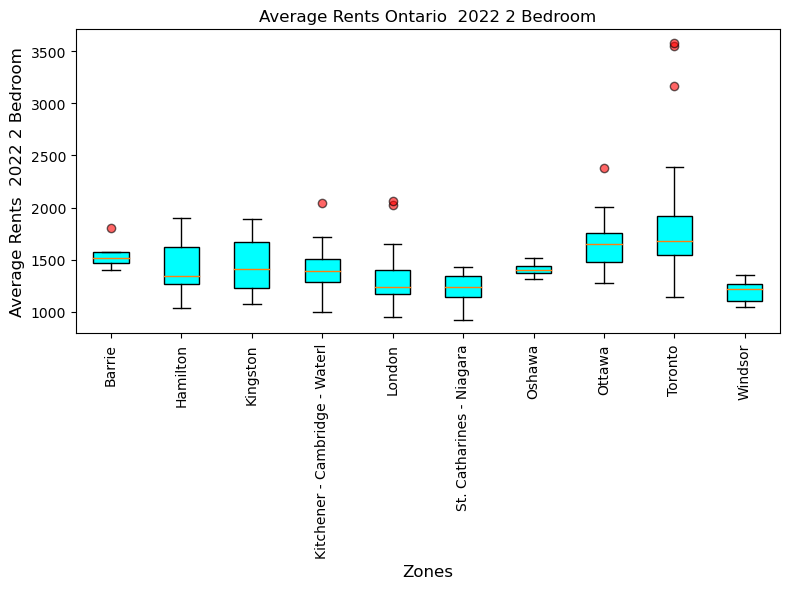

In [145]:
x_data = Centre_data
plt.rcParams["figure.figsize"] = [8,6]
plt.rcParams["figure.autolayout"] = True
box_plot = plt.boxplot(x = x_data,labels = Centre_of_interest, flierprops = out_patch,patch_artist = True)
color = ["Cyan"]
colors = color*len(Centre_of_interest)
plt.xlabel("Zones",fontsize = 12)
plt.ylabel(f"Average Rents in dollars {Year} {column}",fontsize = 12,)
plt.title(f"Average Rents Ontario  {Year} {column}",fontsize = 12)
plt.xticks(rotation = 90)
for patch,color in zip(box_plot["boxes"],colors):
    patch.set_facecolor(color)
plt.savefig(f"Average Rents Ontario {Year} {column}.png") 
plt.tight_layout
plt.show()

In [146]:
df_Toronto = df_Ontario[(df_Ontario["Centre"]=="Toronto")]

In [113]:
df_Toronto

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total,Year
8065,Ont.,Toronto,Toronto (Central),Waterfront Communities -The Island,Apt & Other,0.0,1986.0,2321.0,0.0,2103.0,2022
8067,Ont.,Toronto,Toronto (Central),Moss Park/Regent Park,Apt & Other,1274.0,1824.0,2340.0,3237.0,1930.0,2022
8069,Ont.,Toronto,Toronto (Central),Cabbagetown-S. St. James Town,Apt & Other,1374.0,1593.0,2126.0,0.0,1654.0,2022
8071,Ont.,Toronto,Toronto (Central),North St. James Town,Apt & Other,1376.0,1676.0,2003.0,2266.0,1743.0,2022
8073,Ont.,Toronto,Toronto (Central),Church-Yonge Corridor,Apt & Other,1486.0,1693.0,2201.0,3219.0,1721.0,2022
...,...,...,...,...,...,...,...,...,...,...,...
8323,Ont.,Toronto,Pickering/Ajax/Uxbridge,Ajax/Pickering,Apt & Other,0.0,1193.0,1533.0,1608.0,1556.0,2022
8325,Ont.,Toronto,Pickering/Ajax/Uxbridge,Uxbridge,Apt & Other,0.0,1389.0,1575.0,0.0,1455.0,2022
8327,Ont.,Toronto,Milton/Halton Hills,Milton/Halton Hills,Apt & Other,911.0,1309.0,1523.0,1791.0,1444.0,2022
8329,Ont.,Toronto,Orangeville/Mono,Orangeville/Mono,Apt & Other,0.0,1269.0,1455.0,1588.0,1372.0,2022


In [114]:
df_Toronto["Zone"].unique()

array(['Toronto (Central)', 'Toronto (East)', 'Toronto (North)',
       'Toronto (West)', 'Etobicoke (South)', 'Etobicoke (Central)',
       'Etobicoke (North)', 'York', 'East York', 'Scarborough (Central)',
       'Scarborough (North)', 'Scarborough (East)',
       'North York (Southeast)', 'North York (Northeast)',
       'North York (Southwest)', 'North York (N.Central)',
       'North York (Northwest)', 'Mississauga (South)',
       'Mississauga (Northwest)', 'Mississauga (Northeast)',
       'Brampton (West)', 'Brampton (East)', 'Oakville',
       'Richmond Hill/Vaughan/King', 'Aurora, Newmkt, Whit-St.',
       'Markham', 'Pickering/Ajax/Uxbridge', 'Milton/Halton Hills',
       'Orangeville/Mono', 'Bradford/West Gwillimbury/New Tecumseth'],
      dtype=object)

In [115]:
Zones_of_interest = ['Toronto (Central)', 'Toronto (North)', 'Toronto (West)',
       'Etobicoke (South)', 'Etobicoke (Central)', 'Etobicoke (North)',
       'York', 'East York', 'Scarborough (Central)',
       'Scarborough (North)', 'Scarborough (East)',
       'North York (Southeast)', 'North York (Northeast)',
       'North York (Southwest)', 'North York (N.Central)',
       'North York (Northwest)', 'Mississauga (South)',
       'Mississauga (Northwest)', 'Mississauga (Northeast)',
       'Brampton (West)', 'Oakville']

In [116]:
Zonal_data = []
for each in Zones_of_interest:
    df = df_Toronto[(df_Toronto["Zone"])==each]
    Zonal_data.append(df[column])
    
    

In [117]:
Zonal_data

[8065    1986.0
 8067    1824.0
 8069    1593.0
 8071    1676.0
 8073    1693.0
 8075    2356.0
 8079    1758.0
 8081    1957.0
 Name: 1 Bedroom, dtype: float64,
 8093    1837.0
 8095    1828.0
 8097    1710.0
 8099    1677.0
 8101    1601.0
 8103    1741.0
 8105    1668.0
 8107    1866.0
 8109    1479.0
 8111    1588.0
 Name: 1 Bedroom, dtype: float64,
 8113    1391.0
 8115    1459.0
 8117    1630.0
 8119    1439.0
 8121    1426.0
 8123    1539.0
 8125    1709.0
 8127    1156.0
 Name: 1 Bedroom, dtype: float64,
 8129    1294.0
 8131    1285.0
 8133    1298.0
 8139    1432.0
 Name: 1 Bedroom, dtype: float64,
 8141    2035.0
 8143    1582.0
 8145    1611.0
 8147    1592.0
 8149    2000.0
 8151    1705.0
 8153    1613.0
 8155    1647.0
 8157    1514.0
 Name: 1 Bedroom, dtype: float64,
 8161    1264.0
 8163    1254.0
 8165    1491.0
 Name: 1 Bedroom, dtype: float64,
 8167    1682.0
 8169    1538.0
 8171    1240.0
 8175    1369.0
 8177    1358.0
 8179    1203.0
 8181    1358.0
 8183     95

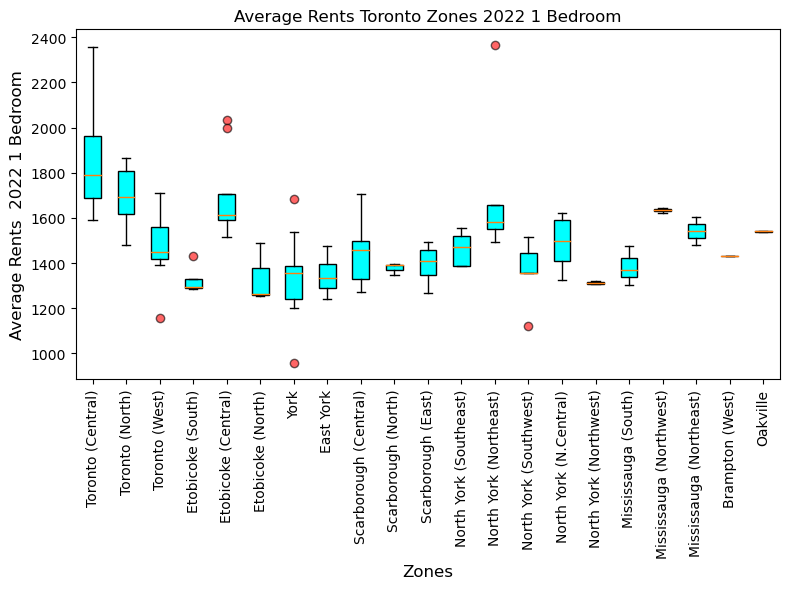

In [118]:
x_data = Zonal_data
plt.rcParams["figure.figsize"] = [8,6]
plt.rcParams["figure.autolayout"] = True
box_plot = plt.boxplot(x = x_data,labels = Zones_of_interest, flierprops = out_patch,patch_artist = True)
color = ["Cyan"]
colors = color*len(Zones_of_interest)
plt.xlabel("Zones",fontsize = 12)
plt.ylabel(f"Average Rents in dollars {Year} {column}",fontsize = 12,)
plt.title(f"Average Rents Toronto Zones {Year} {column}",fontsize = 12)
plt.xticks(rotation = 90)
for patch,color in zip(box_plot["boxes"],colors):
    patch.set_facecolor(color)
plt.savefig(f"Average Rents Toronto {Year} {column}.png") 
plt.tight_layout
plt.show()